In [1]:
import os
import numpy as np
import matplotlib.pylab as plt
os.chdir('../../')
from src.dynamical_system.simulate_method import simulate_rk4
from src.dynamical_system.model import rossler
from src.bifurcation import local_maxima

In [9]:
## Simulate bifurcation diagram

a, c = 0.2, 5.7
b_range = np.arange(0.6, 0.75, 0.0005)

x_init, y_init, z_init = 0., 1., -1.

simulation_settings={'number of samples':None,
                     'start time':0.,
                     'ending time':2000.,
                     'time step size':0.1,}

warmup_step = 1000

t_list = []
X_list = []
y_list = []
b_list = []
for b in b_range:
    X, t = simulate_rk4(system_model=rossler, 
                        model_params=[a, b, c], 
                        initial_state=[x_init, y_init, z_init], 
                        simulation_settings=simulation_settings,)
    t_list.append(t[warmup_step:])
    X_list.append(X[warmup_step:])
    y_list.append(X[warmup_step:, 1])
    b_list.append(np.full(len(X[warmup_step:, 1]), b))

Simulation:   0%|          | 0/20000 [00:00<?, ?it/s]

In [10]:
### Get the local-maxima(lm)

y_lm_list, idx_lm_list, b_lm_list, y_lm_flat, idx_lm_flat, b_lm_flat = local_maxima(data_list=y_list,
                                                                                    parameter_list=b_list,
                                                                                    prominence=1.,
                                                                                    return_flatten=True)

In [11]:
from matplotlib import gridspec
rcParams_dict = {
                'font.family':'Times New Roman',
                'mathtext.fontset':'stix',
                'font.size':15,
                'xtick.direction':'in',
                'ytick.direction':'in',
                'axes.linewidth':1.5,
                'xtick.major.size':8,
                'ytick.major.size':8,
                }
for key in rcParams_dict.keys(): plt.rcParams[str(key)] = rcParams_dict[str(key)]

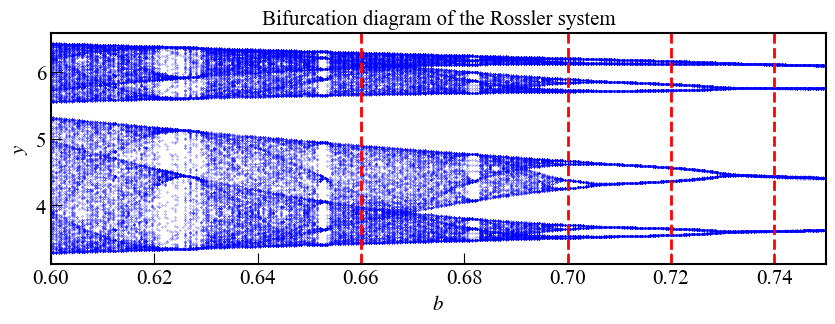

In [12]:
parameters = [0.66, 0.70, 0.72, 0.74]

spec = gridspec.GridSpec(ncols=1, nrows=1, height_ratios=[1], hspace=0)
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(spec[0])
ax.set_title('Bifurcation diagram of the Rossler system', loc='center', fontsize=plt.rcParams['font.size'])
ax.scatter(b_lm_flat, y_lm_flat, s=0.05, c='b')
ax.set_xlabel(r'$b$')
ax.set_ylabel(r'$y$')
ax.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%.2f'))
ax.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
ax.set_xlim(b_lm_flat[0], b_lm_flat[-1])
for p in parameters: ax.axvline(x=p, linestyle='--', c='r', lw=2)

plt.show()

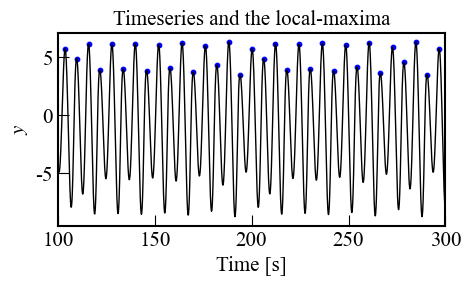

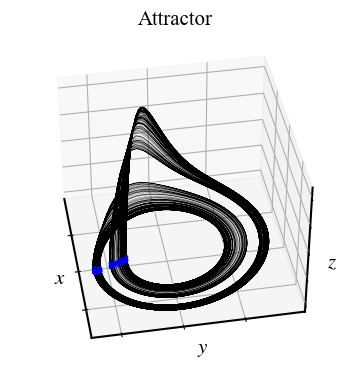

In [13]:
p = parameters[0]
plt_num = 2000


p_idx = np.argmin(np.abs(np.array(b_range) - p))

spec = gridspec.GridSpec(ncols=1, nrows=1, )
fig = plt.figure(figsize=(5, 2.5))

ax = fig.add_subplot(spec[0])
ax.set_title('Timeseries and the local-maxima', loc='center', fontsize=plt.rcParams['font.size'])
ax.plot(t_list[p_idx], y_list[p_idx], lw=1, c='k')
ax.scatter(t_list[p_idx][idx_lm_list[p_idx]], y_list[p_idx][idx_lm_list[p_idx]], s=10, c='b')
ax.set_xlabel(r'Time [s]')
ax.set_ylabel(r'$y$')
ax.get_xaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
ax.get_yaxis().set_major_formatter(plt.FormatStrFormatter('%d'))
ax.set_xlim(t_list[p_idx][0], t_list[p_idx][plt_num])

plt.show()

spec = gridspec.GridSpec(ncols=1, nrows=1, )
fig = plt.figure(figsize=(4, 4))

ax = fig.add_subplot(spec[0], projection='3d')
ax.set_title('Attractor', loc='center', fontsize=plt.rcParams['font.size'])
ax.plot(X_list[p_idx][:, 0], X_list[p_idx][:, 1], X_list[p_idx][:, 2], lw=0.1, c='k')
ax.scatter(X_list[p_idx][:, 0][idx_lm_list[p_idx]], y_list[p_idx][idx_lm_list[p_idx]], X_list[p_idx][:, 2][idx_lm_list[p_idx]], s=1, c='b')
ax.set_xlabel(r'$x$', labelpad=-10)
ax.set_ylabel(r'$y$', labelpad=-10)
ax.set_zlabel(r'$z$', labelpad=-10)
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.view_init(elev=40, azim=170, roll=0)

plt.tight_layout()
plt.show()